<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#KNeighborsRegressor" data-toc-modified-id="KNeighborsRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>KNeighborsRegressor</a></span></li><li><span><a href="#LinearSVR" data-toc-modified-id="LinearSVR-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LinearSVR</a></span></li><li><span><a href="#GradientBoostingRegressor" data-toc-modified-id="GradientBoostingRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>GradientBoostingRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#KNeighborsRegressor" data-toc-modified-id="KNeighborsRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>KNeighborsRegressor</a></span></li><li><span><a href="#LinearSVR" data-toc-modified-id="LinearSVR-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LinearSVR</a></span></li><li><span><a href="#GradientBoostingRegressor" data-toc-modified-id="GradientBoostingRegressor-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>GradientBoostingRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li><li><span><a href="#Вывод-проекта" data-toc-modified-id="Вывод-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод проекта</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import numpy as np
import pandas as pd 
import IPython
from IPython.display import display
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from catboost import CatBoostRegressor, Pool
import xgboost as xgb

In [2]:
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
display(df)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Датасет содержит 26496 значений. Временной интревал наблюдений составляет 10 минут.
Пропущенных значений нет.
При первичном анализе установлено, что временной промежуток данных длится с 1 марта 2018 года по 31 августа 2018 года. 
Проверю хронологичность записи данных.

In [5]:
df.index.is_monotonic == True

True

Данные записаны последовательно. Выполню ресемплирование в соответствии с заданием

In [6]:
df = df.resample('1H').sum()
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


**Вывод:**
1. Данные загружены и изучены.
2. Данные в датасете записаны с интервалом в 10 минут в хронологическом порядке.
3. Выполнено ресемплирование по 1 часу в соответствии с заданием.
4. Пропусков и аномалий в данных не обнаружено.

## Анализ

In [7]:
df.sort_values(by='num_orders')
df.head(15)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


Проверяю распределение заказов 

Медианное значение заказов =  78.0


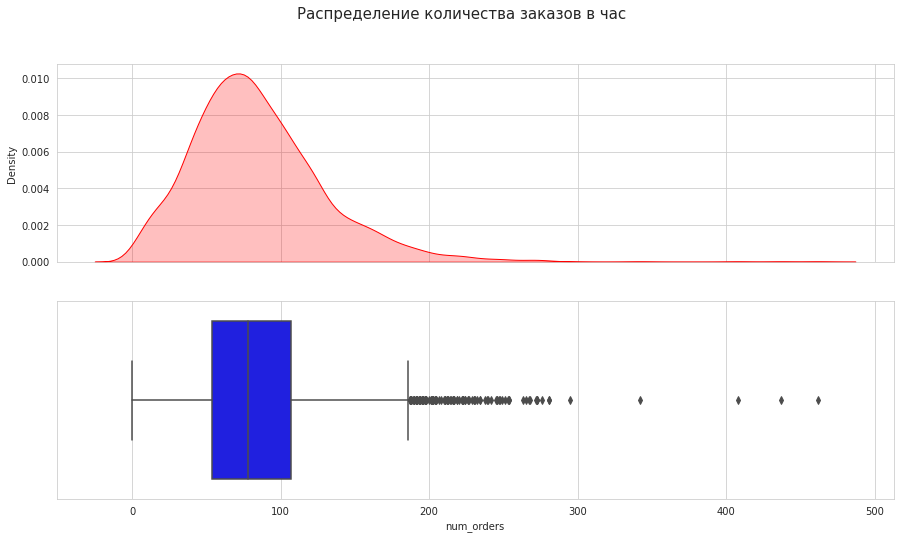

In [8]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(2,1,sharex=True, figsize=(15,8))

sns.kdeplot(df['num_orders'], color='red', shade=True, label='Количество заказов', ax=axes[0])
sns.boxplot(df['num_orders'], orient='h', color='blue')

plt.suptitle('Распределениe количества заказов в час', size=15);

print('Медианное значение заказов = ', df['num_orders'].median())

Серьёзных выбросов не обнаружено, чаще всего в час поступает в среднем 78 заказов. Далее проверю к какому типу относится временной ряд.

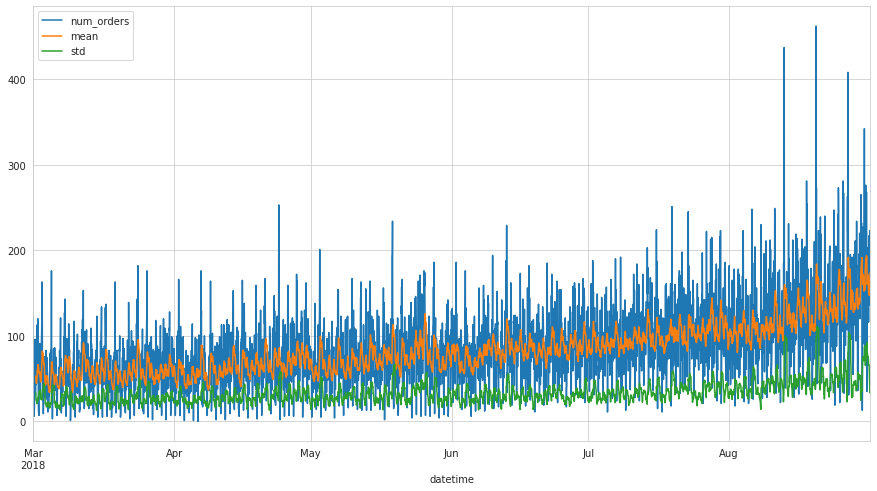

In [9]:
df['mean'] = df['num_orders'].rolling(15).mean()
df['std'] = df['num_orders'].rolling(15).std()

df.plot(figsize=(15,8));

Скользящее среднее отклонение со временем изменяеся равномерно. Среднее значение высоко поднимется в августе. Соответственно это стандартный временной ряд. Далее стоит проверить тренд на сезонность.

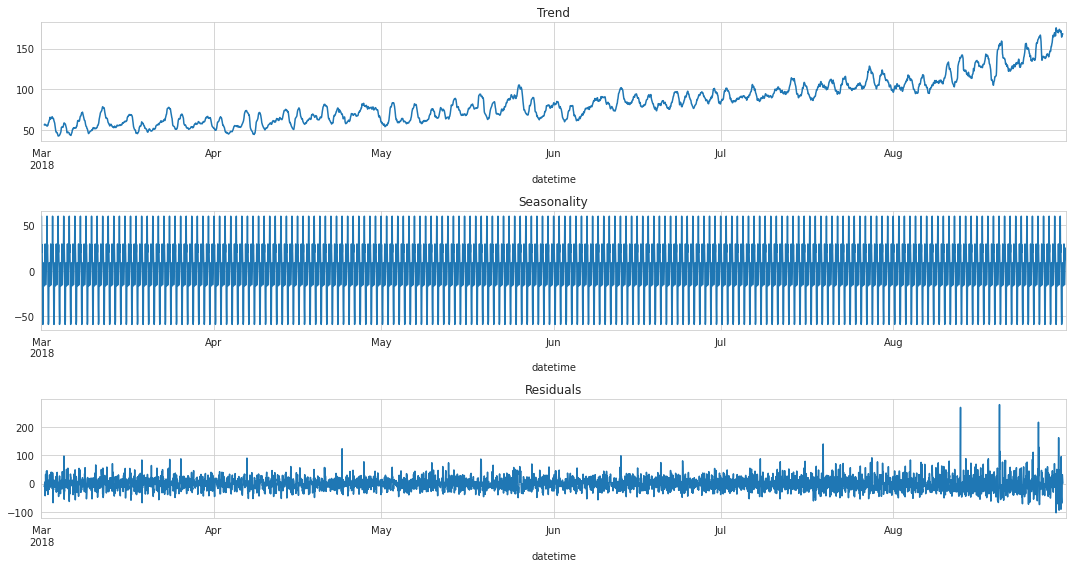

In [10]:
df = df.drop(['mean','std'], axis=1)
decomposed = seasonal_decompose(df)

plt.figure(figsize=(15, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Глобальный тренд увеличения числа заказов такси прослеживается на протяжении всего изучаемого периода.
Для изучения сезонности на данном графике увеличю масштаб.
Для примера возьму 2 месяца апрель и август в первые трое суток.

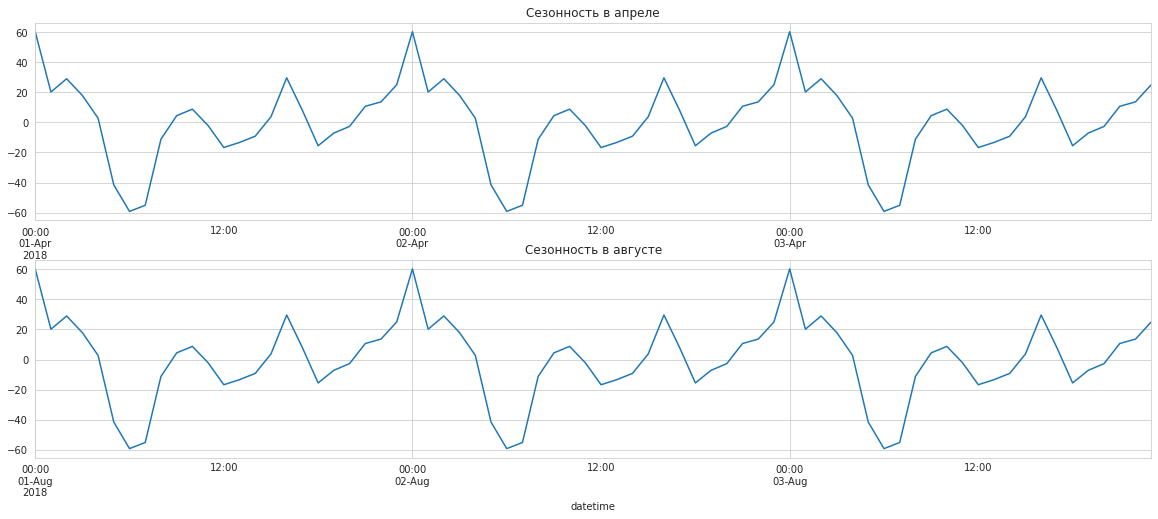

In [11]:
plt.figure(figsize=(20, 8))

plt.subplot(211)
decomposed.seasonal['2018-04-01':'2018-04-03'].plot(ax=plt.gca())
plt.title('Сезонность в апреле')
plt.subplot(212)
decomposed.seasonal['2018-08-01':'2018-08-03'].plot(ax=plt.gca())
plt.title('Сезонность в августе');

**Выводы:**

1. Чаще всего за час в службу такси поступают в среднем 78 заказов,
2. На протяжении исследуемого периода заметен тренд к увеличению количество заказов.
3. Обнаружена "сезонность" загруженности: пиковые часы приходятся на 00 и примерно на 15-17 часов вечера,
4. Минимальная загрузка наблюдается в течение часа, с 6 до 7 утра, так же две небольшие просадки количества заказов заметны в 12 и примерно 18-19 часов.
5. Можно предположить о необходимости усиления рабочих смен таксистов именно указанные выше пиковые часы.

## Обучение

Создадам дополнительные признаки в исходном сете для лучшего обучения моделей.
На вход функция принимает датасет, количество "шагов" для отстающий значений и скользящее среднее без учета текущего значения количества заказов. Новые признаки так же определяются, как месяц, день, день недели и час.

In [12]:
def new_features(data, max_lag, rolling_mean_size):
    
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

In [13]:
new_features(df, 10,10)

In [14]:
df.head()

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,rolling_mean
datetime,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь разобью датасет на обучающую, валидационную и тестовую выборки

In [15]:
sub, test = train_test_split(df, test_size=.1, shuffle=False)
train, valid = train_test_split(sub, test_size=.1, shuffle=False)

In [16]:
train.dropna(inplace=True)

In [17]:
train.shape[0], valid.shape[0], test.shape[0]

(3566, 398, 442)

Теперь разбивка на признаки и целевой признак

In [18]:
x_train = train.drop(['num_orders'], axis=1)
x_valid = valid.drop(['num_orders'], axis=1)
x_test = test.drop(['num_orders'], axis=1)

y_train = train['num_orders']
y_valid = valid['num_orders']
y_test = test['num_orders']

Попробую предсказать временной период медианный значеним качество метрики rmse, которой можно добиться.
Далее все модели будут тестироватся только на валидационной выборке.

In [19]:
y_valid_med = np.ones(y_valid.shape) * y_train.median()
y_test_med = np.ones(y_test.shape) * y_train.median()

print("RMSE valid:", mean_squared_error(y_valid, y_valid_med)**0.5)
print("RMSE test:", mean_squared_error(y_test, y_test_med)**0.5)

RMSE valid: 60.16539181173257
RMSE test: 89.39768286346948


Очень плохой результат. Посмотрю, что покажут модели.

### LinearRegression

Начну с самой простой модели линейной регрессии

In [20]:
%%time
lr = LinearRegression().fit(x_train, y_train)

CPU times: user 9.75 ms, sys: 11.2 ms, total: 20.9 ms
Wall time: 12.5 ms


In [21]:
def prediction(model, feat, targ):
    
    pred = model.predict(feat)
    rmse = mean_squared_error(pred, targ)**0.5
    
    return(rmse)

In [22]:
%%time
prediction(lr, x_valid, y_valid)

CPU times: user 5.99 ms, sys: 0 ns, total: 5.99 ms
Wall time: 8.13 ms


40.57041300704119

Результат гораздо лучше. Далее создам таблицу для записи резултатов работы моделей

In [23]:
res = {
    'model_name':pd.Series(['LinearRegression','KNeighborsRegressor','LinearSVR','GradientBoostingRegressor','CatBoost']),
    'rmse_valid':pd.Series([40.57])}

results = pd.DataFrame(res)
results

,model_name,rmse_valid
0,LinearRegression,40.57
1,KNeighborsRegressor,NaN
2,LinearSVR,NaN
3,GradientBoostingRegressor,NaN
4,CatBoost,NaN


### KNeighborsRegressor

Для применения данной и следующей модели данные необходимо скалировать. К работе с соседями применяю MinMax преобразование.

In [24]:
min_max = MinMaxScaler()

min_max.fit(x_train)

x_train_mm = min_max.transform(x_train)
x_valid_mm = min_max.transform(x_valid)
x_test_mm = min_max.transform(x_test)

Применю функцию поиска гиперпараметров

In [25]:
len(x_train)

3566

In [26]:
def grid(model, params, feat, targ):
    
    tscv = TimeSeriesSplit(n_splits=5)
    
    search = GridSearchCV(model, params, cv=tscv, n_jobs=-1, scoring='neg_mean_squared_error')
    search.fit(feat, targ)
    
    print('Best score = ', search.best_score_)
    print(search.best_params_)

Создаю модель и сетку гиперпараметров

In [27]:
knn = KNeighborsRegressor()

knn_params = dict(n_neighbors=range(3,10),
                   metric=['minkowski', 'manhattan'],
                   leaf_size=[20,25,30,35],
                   algorithm=['auto','ball_tree','kd_tree'])

In [28]:
grid(knn, knn_params, x_train_mm, y_train)

Best score =  -687.8805608164982
{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 8}


In [29]:
knn = KNeighborsRegressor(algorithm='auto', leaf_size=20, metric='manhattan', n_neighbors=9)

In [30]:
%%time
knn.fit(x_train_mm, y_train)

CPU times: user 12.6 ms, sys: 15 µs, total: 12.6 ms
Wall time: 30.4 ms


KNeighborsRegressor(leaf_size=20, metric='manhattan', n_neighbors=9)

In [31]:
%%time
prediction(knn, x_valid_mm, y_valid)

CPU times: user 59.4 ms, sys: 3.66 ms, total: 63 ms
Wall time: 63.5 ms


35.61568713080818

Метрика оказалась ещё лучше, чем LR. Запишу значения.

In [32]:
results.loc[1,'rmse_valid'] = 35.62
results

,model_name,rmse_valid
0,LinearRegression,40.57
1,KNeighborsRegressor,35.62
2,LinearSVR,NaN
3,GradientBoostingRegressor,NaN
4,CatBoost,NaN


### LinearSVR

Поскольку у есть слишком сильно отклоняющие значения, то прогноз на тестовой выборке может быть не слишком точным. Но всё же посмотрю. Данные скалирую данные с помощью StandardScaler

In [33]:
st_sc = StandardScaler()

st_sc.fit(x_train)

x_train_ss = st_sc.transform(x_train)
x_valid_ss = st_sc.transform(x_valid)
x_test_ss = st_sc.transform(x_test)

In [34]:
svm = LinearSVR(random_state=123)

svm_params = dict(max_iter=[100,500,1000,1200,1500],
                  C=[0.1,0.5,1],
                  tol=[1e-3, 1e-4, 1e-5])

In [35]:
grid(svm, svm_params, x_train_ss, y_train)

Best score =  -1136.3816490388363
{'C': 1, 'max_iter': 100, 'tol': 0.001}


In [36]:
svm = LinearSVR(random_state=123, C=1, max_iter=100, tol=0.0001)

In [37]:
%%time
svm.fit(x_train_ss, y_train)

CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 10.5 ms


LinearSVR(C=1, max_iter=100, random_state=123)

In [38]:
%%time
prediction(svm, x_valid_ss, y_valid)

CPU times: user 1.59 ms, sys: 36 µs, total: 1.62 ms
Wall time: 1.34 ms


41.28235575351795

Пока самые худшие предсказания. Запишу. Далее градиентный бустинг.

In [39]:
results.loc[2,'rmse_valid'] = 41.28
results

,model_name,rmse_valid
0,LinearRegression,40.57
1,KNeighborsRegressor,35.62
2,LinearSVR,41.28
3,GradientBoostingRegressor,NaN
4,CatBoost,NaN


### GradientBoostingRegressor

Тут сразу можно перейти к подбору гиперпараметров и обучению модели.

Поиск параметров осуществляю в 2 этапа - сначала подбираю лучшее количество деревьев, затем - остальные параметры.

In [40]:
gbr = GradientBoostingRegressor(random_state=123)

gbr_params_est = dict(n_estimators=range(100,1000,10))

gbr_params_other = dict(learning_rate=[0.1,1],
                        max_depth=[2,3,4,5],
                        min_samples_split=[2,3,4], 
                        tol=[1e-3, 1e-4, 1e-5])

In [41]:
gbr = GradientBoostingRegressor(random_state=123, n_estimators=200)

In [42]:
#grid(gbr, gbr_params_other, x_train, y_train)

In [43]:
gbr = GradientBoostingRegressor(random_state=123, n_estimators=200, learning_rate=0.15, max_depth=4, min_samples_split=4, tol=0.001)

In [44]:
%%time
gbr.fit(x_train, y_train)

CPU times: user 2.71 s, sys: 336 µs, total: 2.71 s
Wall time: 2.72 s


GradientBoostingRegressor(learning_rate=0.15, max_depth=4, min_samples_split=4,
                          n_estimators=200, random_state=123, tol=0.001)

In [45]:
%%time
prediction(gbr, x_valid, y_valid)

CPU times: user 7.9 ms, sys: 0 ns, total: 7.9 ms
Wall time: 9.25 ms


32.09402710959909

Самое лучшее предсказание на данный момент. Запишу и перейду к кэтбусту.

In [46]:
results.loc[3,'rmse_valid'] = 32.1
results

,model_name,rmse_valid
0,LinearRegression,40.57
1,KNeighborsRegressor,35.62
2,LinearSVR,41.28
3,GradientBoostingRegressor,32.10
4,CatBoost,NaN


### CatBoostRegressor

Категориальный список

In [47]:
df.columns

Index(['num_orders', 'month', 'day', 'dayofweek', 'hour', 'lag_1', 'lag_2',
       'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10',
       'rolling_mean'],
      dtype='object')

Создаю пулы, обучаю и тестирую модель

In [48]:
cat_features = ['month', 'day', 'dayofweek', 'hour']

In [49]:
catboost_train = Pool(x_train, y_train, cat_features=cat_features)

In [50]:
catboost = CatBoostRegressor(
                          iterations=200, 
                          depth=4, 
                          learning_rate=0.2, 
                          loss_function='RMSE', 
                          subsample=0.4,
                          verbose=0, 
                          random_seed=123)

In [51]:
%%time
catboost.fit(catboost_train)

CPU times: user 1.03 s, sys: 63.6 ms, total: 1.09 s
Wall time: 2.86 s


In [52]:
%time
prediction(catboost, x_valid, y_valid)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.4 µs


34.531921273808095

Методом подбора нашёл оптимальные параметры модели

In [53]:
cbr  = CatBoostRegressor(
                          iterations=250, 
                          depth=3, 
                          learning_rate=0.5, 
                          loss_function='RMSE', 
                          subsample=0.5,
                          verbose=0, 
                          random_seed=123)

In [54]:
%%time
cbr.fit(catboost_train)

CPU times: user 1.01 s, sys: 28.2 ms, total: 1.04 s
Wall time: 2.58 s


In [55]:
%%time
prediction(cbr, x_valid, y_valid)

CPU times: user 6.46 ms, sys: 0 ns, total: 6.46 ms
Wall time: 4.31 ms


32.39313915627565

Также хороший результат.Запишу.

In [56]:
results.loc[4,'rmse_valid'] = 32.39

results

,model_name,rmse_valid
0,LinearRegression,40.57
1,KNeighborsRegressor,35.62
2,LinearSVR,41.28
3,GradientBoostingRegressor,32.10
4,CatBoost,32.39


**Вывод:**
1. На данном этапе было протестировано 5 моделей
2. Все исследуемые модели продемонстрировали показатель метрики rmse, лучше, чем дамми модель.
3. На текущий момент лучшей моделью по качеству является GradientBoostingRegressor, худшей - LinearSVR.

Перейду к тестированию моделей.

## Тестирование

In [57]:
sub_upd = sub.dropna()

In [58]:
feat = sub_upd.drop(['num_orders'], axis=1)
targ = sub_upd['num_orders'] 


feat_mm = min_max.transform(feat)
feat_ss = st_sc.transform(feat)

In [59]:
catboost_full = Pool(feat, targ, cat_features=cat_features)

### LinearRegression

In [60]:
%%time
lr.fit(feat, targ)

CPU times: user 5.39 ms, sys: 4.02 ms, total: 9.41 ms
Wall time: 6.52 ms


LinearRegression()

In [61]:
%%time
prediction(lr, x_test, y_test)

CPU times: user 16.9 ms, sys: 4.11 ms, total: 21 ms
Wall time: 37.7 ms


53.45464385673254

In [62]:
results.loc[0,'rmse_test'] = 53.45
results

,model_name,rmse_valid,rmse_test
0,LinearRegression,40.57,53.45
1,KNeighborsRegressor,35.62,NaN
2,LinearSVR,41.28,NaN
3,GradientBoostingRegressor,32.10,NaN
4,CatBoost,32.39,NaN


### KNeighborsRegressor

In [63]:
%%time
knn.fit(feat_mm, targ)

CPU times: user 13.4 ms, sys: 37 µs, total: 13.5 ms
Wall time: 12.5 ms


KNeighborsRegressor(leaf_size=20, metric='manhattan', n_neighbors=9)

In [64]:
%%time
prediction(knn, x_test_mm, y_test)

CPU times: user 217 ms, sys: 4.23 ms, total: 221 ms
Wall time: 239 ms


52.25397796826214

In [65]:
results.loc[1,'rmse_test'] = 52.25
results

,model_name,rmse_valid,rmse_test
0,LinearRegression,40.57,53.45
1,KNeighborsRegressor,35.62,52.25
2,LinearSVR,41.28,NaN
3,GradientBoostingRegressor,32.10,NaN
4,CatBoost,32.39,NaN


### LinearSVR

In [66]:
%%time
svm.fit(feat_ss, targ)

CPU times: user 16 ms, sys: 2 µs, total: 16 ms
Wall time: 15 ms


LinearSVR(C=1, max_iter=100, random_state=123)

In [67]:
%%time
prediction(svm, x_test_ss, y_test)

CPU times: user 2.21 ms, sys: 0 ns, total: 2.21 ms
Wall time: 1.94 ms


54.38838751733362

In [68]:
results.loc[2,'rmse_test'] = 54.39
results

,model_name,rmse_valid,rmse_test
0,LinearRegression,40.57,53.45
1,KNeighborsRegressor,35.62,52.25
2,LinearSVR,41.28,54.39
3,GradientBoostingRegressor,32.10,NaN
4,CatBoost,32.39,NaN


### GradientBoostingRegressor

In [69]:
%%time
gbr.fit(feat, targ)

CPU times: user 3.72 s, sys: 202 µs, total: 3.72 s
Wall time: 3.73 s


GradientBoostingRegressor(learning_rate=0.15, max_depth=4, min_samples_split=4,
                          n_estimators=200, random_state=123, tol=0.001)

In [70]:
%%time
prediction(gbr, x_test, y_test)

CPU times: user 8.94 ms, sys: 23 µs, total: 8.96 ms
Wall time: 10.3 ms


45.71549058152509

In [71]:
results.loc[3,'rmse_test'] = 45.72
results

,model_name,rmse_valid,rmse_test
0,LinearRegression,40.57,53.45
1,KNeighborsRegressor,35.62,52.25
2,LinearSVR,41.28,54.39
3,GradientBoostingRegressor,32.10,45.72
4,CatBoost,32.39,NaN


### CatBoostRegressor

In [72]:
%%time
catboost.fit(catboost_full)

CPU times: user 1.22 s, sys: 16.2 ms, total: 1.23 s
Wall time: 2.83 s


In [73]:
%%time
prediction(catboost, x_test, y_test)

CPU times: user 6.58 ms, sys: 0 ns, total: 6.58 ms
Wall time: 10.6 ms


40.63003942157542

In [74]:
results.loc[4,'rmse_test'] = 40.63
results

,model_name,rmse_valid,rmse_test
0,LinearRegression,40.57,53.45
1,KNeighborsRegressor,35.62,52.25
2,LinearSVR,41.28,54.39
3,GradientBoostingRegressor,32.10,45.72
4,CatBoost,32.39,40.63


In [75]:
sort = results.sort_values(by='rmse_test')
sort

,model_name,rmse_valid,rmse_test
4,CatBoost,32.39,40.63
3,GradientBoostingRegressor,32.10,45.72
1,KNeighborsRegressor,35.62,52.25
0,LinearRegression,40.57,53.45
2,LinearSVR,41.28,54.39


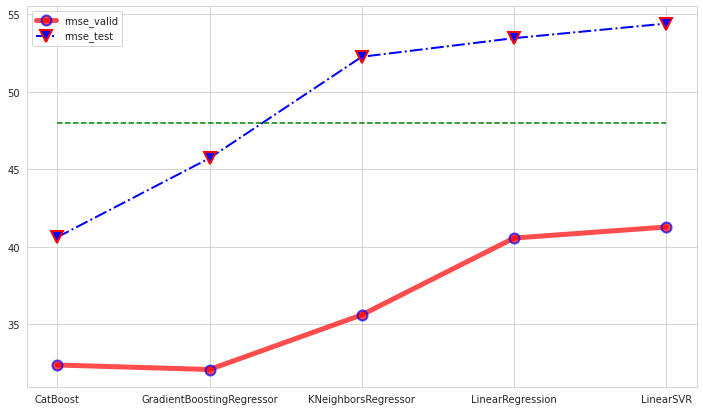

In [129]:
x = ['CatBoost', 'GradientBoostingRegressor', 'KNeighborsRegressor', 'LinearRegression', 'LinearSVR']
y1 = [32.39, 32.10, 35.62, 40.57, 41.28]
y2 = [40.63, 45.72, 52.25, 53.45, 54.39]
y3 =[48,48,48,48,48]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="rmse_valid", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, y2, 'v-.b', label="rmse_test", mec='r', lw=2, mew=2, ms=12)
plt.plot(x, y3, color='green', linestyle='dashed')

plt.legend()
plt.grid(True)

**Вывод:**
1. На данном этапе производилось измерение качества предсказаний на тестовой выборке.
2. По результатам исследования к применению в реальной работе рекомендуются CatBoostRegressor и GradientBoostingRegressor. Они показали лучше результаты и "вписались" в требования проекта.

## Вывод проекта

**Целью проекта является:**
1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.
Значение метрики RMSE на тестовой выборке должно быть не больше 48.

**В данном проекте:**
1. Данные загружены, изучены, выполнено ресемплирование по 1 часу.
2. Данные проанализированы. Чаще всего за час в службу такси поступают в среднем 78 заказов. На протяжении исследуемого периода заметен тренд к увеличению количество заказов. Обнаружена "сезонность" загруженности: пиковые часы приходятся на 00 и примерно на 15-17 часов вечера,Минимальная загрузка наблюдается в течение часа, с 6 до 7 утра, так же две небольшие просадки количества заказов заметны в 12 и примерно 18-19 часов. Можно предположить о необходимости усиления рабочих смен таксистов именно указанные выше пиковые часы.
3. Было обучено 5 разных моделей с тестовой выборкой размером 10% от исходных данных. Лучшей моделью по качеству является GradientBoostingRegressor, худшей - LinearSVR.
4. Были проверены данные на тестовой выборке.По результатам исследования к применению в реальной работе рекомендуются CatBoostRegressor и GradientBoostingRegressor. Они показали лучше результаты и "вписались" в требования проекта с показаниями метрики RMSE 40.63 и 45.72 соответственно.

P.S. После финальной компиляции проекта кэтбуст улучшился на 2 пункта. Интересно) Псевдослучайность никто не отменял.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48